### A Hybrid Genetic Algorithm-Particle Swarm Optimization Framework to Enhance Network Intrusion Detection Systems

In [113]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [114]:
digit=load_digits()

In [115]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

2


<Figure size 432x288 with 0 Axes>

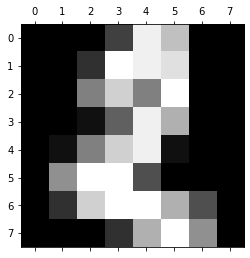

In [119]:
plt.gray()
plt.matshow(digit.images[2])
print(digit.target[2])

# Fitness model to check accuracy of model

In [79]:
def fitness_function(params, X_train, y_train, X_test, y_test):
    k = int(params[0])  # Example parameter: number of neighbors for KNN
    model = KNeighborsClassifier(algorithm="brute",n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return accuracy_score(y_test, predictions)

# Genetic Algorithm

### Population Initialization

In [120]:
def init_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        individual = [random.randint(bounds[0], bounds[1]) for bounds in param_bounds]
        population.append(individual)
    return population
# Random Sample 

### Selecting Population based on Fitness Score

In [81]:
def selection(population, fitness_scores):
    selected = random.choices(population, weights=fitness_scores, k=len(population))
    return selected

### CrossOver of Parent to new Child

In [82]:
def crossover(parent1, parent2):
    if(len(parent1)<2 or len(parent2)<2):
        return parent2,parent1
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2


### Mutation

In [83]:
def mutation(individual, param_bounds, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.randint(param_bounds[0][0], param_bounds[0][1])
    return individual

# PSO

### Particle Initialization

In [84]:
def init_particles(pop_size, param_bounds):
    particles = []
    velocities = []
    for _ in range(pop_size):
        particle = [random.randint(bounds[0], bounds[1]) for bounds in param_bounds]
        velocity = [random.uniform(-1, 1)]
        particles.append(particle)
        velocities.append(velocity)
    return particles, velocities


### Update Velocity

In [85]:
def update_velocity(velocity, particle, best_particle, global_best, w, c1, c2):
    for i in range(len(particle)):
        r1, r2 = random.random(), random.random()
        cognitive = c1 * r1 * (best_particle[i] - particle[i])
        social = c2 * r2 * (global_best[i] - particle[i])
        velocity[i] = w * velocity[i] + cognitive + social
    return velocity


### Update Position

In [86]:
def update_position(particle, velocity, param_bounds):
    for i in range(len(particle)):
        particle[i] = int(particle[i] + velocity[i])
        particle[i] = max(min(particle[i], param_bounds[i][1]), param_bounds[i][0])
    return particle


# Hybrid of GA and PSO

In [105]:
def hybrid_ga_pso(X_train, y_train, X_test, y_test, param_bounds, pop_size, num_generations, w, c1, c2, mutation_rate):
    ga_population = init_population(pop_size, param_bounds)
    
    pso_particles, pso_velocities = init_particles(pop_size, param_bounds)
    pso_best_positions = pso_particles.copy()
    pso_best_scores = [fitness_function(p, X_train, y_train, X_test, y_test) for p in pso_particles]
    global_best_position = pso_best_positions[np.argmax(pso_best_scores)]
    global_best_score = max(pso_best_scores)

    for generation in range(num_generations):
        ga_fitness_scores = [fitness_function(ind, X_train, y_train, X_test, y_test) for ind in ga_population]
        
        ga_population = selection(ga_population, ga_fitness_scores)
        new_population = []
        for i in range(0, len(ga_population), 2):
            parent1, parent2 = ga_population[i], ga_population[i+1]
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([child1, child2])
        ga_population = new_population
        # we applied our genetic algorithm for crossover our pso_particle
        ga_population = [mutation(ind, param_bounds, mutation_rate) for ind in ga_population]
        # we applied our genetic algorithm for mutate our pso_particle
        
        for i in range(pop_size):
            pso_velocities[i] = update_velocity(pso_velocities[i], pso_particles[i], pso_best_positions[i], global_best_position, w, c1, c2)
            pso_particles[i] = update_position(pso_particles[i], pso_velocities[i], param_bounds)
            score = fitness_function(pso_particles[i], X_train, y_train, X_test, y_test)
            if score > pso_best_scores[i]:
                pso_best_scores[i] = score
                pso_best_positions[i] = pso_particles[i]
                if score > global_best_score:
                    global_best_score = score
                    global_best_position = pso_particles[i].copy()

        combined_population = ga_population + pso_particles
        combined_scores = ga_fitness_scores + pso_best_scores
        combined_population = [x for _, x in sorted(zip(combined_scores, combined_population), reverse=True)]
        ga_population = combined_population[:pop_size]
        pso_particles = combined_population[pop_size:]
        
        print(f"Generation {generation+1}: Best Score = {global_best_score}")
    
    return global_best_position

# Execution

In [106]:
data = digit
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_bounds = [(1, 10)] 

pop_size = 10
num_generations = 10
w = 0.5     #weight
c1 = 1.5    #cognitive coefficient
c2 = 1.5    #social coefficient
mutation_rate = 0.1

best_params= hybrid_ga_pso(X_train, y_train, X_test, y_test, param_bounds, pop_size, num_generations, w, c1, c2, mutation_rate)
print(f"Best Parameters: {best_params}")


Generation 1: Best Score = 0.9944444444444445
Generation 2: Best Score = 0.9944444444444445
Generation 3: Best Score = 0.9944444444444445
Generation 4: Best Score = 0.9944444444444445
Generation 5: Best Score = 0.9944444444444445
Generation 6: Best Score = 0.9944444444444445
Generation 7: Best Score = 0.9944444444444445
Generation 8: Best Score = 0.9944444444444445
Generation 9: Best Score = 0.9944444444444445
Generation 10: Best Score = 0.9944444444444445
Best Parameters: [6]


In [132]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [133]:
model.score(X_test,y_test)

0.9944444444444445

In [134]:
from sklearn.metrics import confusion_matrix

In [135]:
y_predict=model.predict(X_test)
cm=confusion_matrix(y_test,y_predict)

In [136]:
import seaborn as sns

Text(69.0, 0.5, 'Predicted')

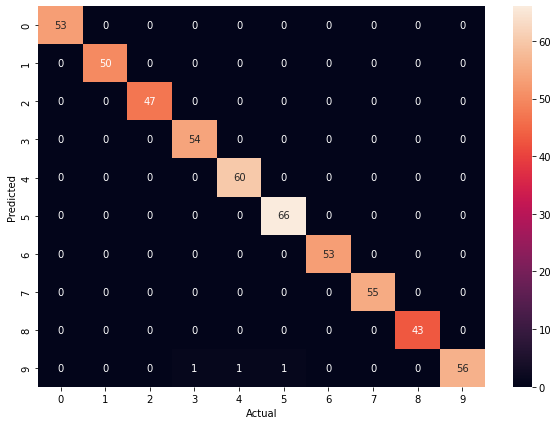

In [137]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

## We can see the accuracy is well enough it has only 3 outliers in train model